### Data Description:
- The dataset contains information about iris flowers, specifically their sepal length, sepal width, petal length, petal width, and species. There are a total six columns in the dataset:

1. Id: Unique identifier for each sample.
2. SepalLengthCm: Length of the sepal (in centimeters).
3. SepalWidthCm: Width of the sepal (in centimeters).
4. PetalLengthCm: Length of the petal (in centimeters).
5. PetalWidthCm: Width of the petal (in centimeters).
6. Species: The species of the iris flower.

- The dataset consists of three iris species, with 50 samples for each species. 

### Problem Statement:
- Develop a classification model using the iris dataset to accurately predict the species of an iris flower based on its sepal length, sepal width, petal length, and petal width. 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking the shape of data
df.shape

(150, 6)

In [4]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
# checking for null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No null value is present**

In [7]:
# change column name from sentence case to lowercase
df = df.rename(columns=str.lower)
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# check value counts for target variable
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

***We have an equal contribution for each species, so we can  say that our data is balanced***

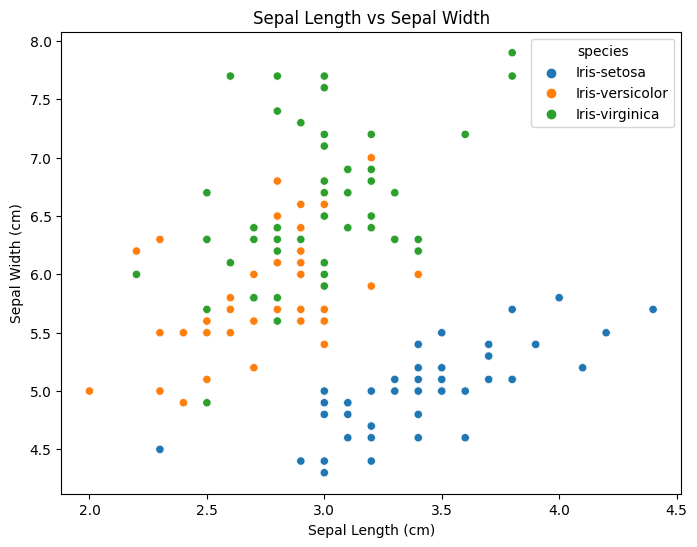

In [9]:
# Create the scatter plot

plt.figure(figsize=(8, 6))

sns.scatterplot(y='sepallengthcm', x='sepalwidthcm', hue='species',data=df)

plt.title('Sepal Length vs Sepal Width')

plt.xlabel('Sepal Length (cm)')

plt.ylabel('Sepal Width (cm)')

plt.show()

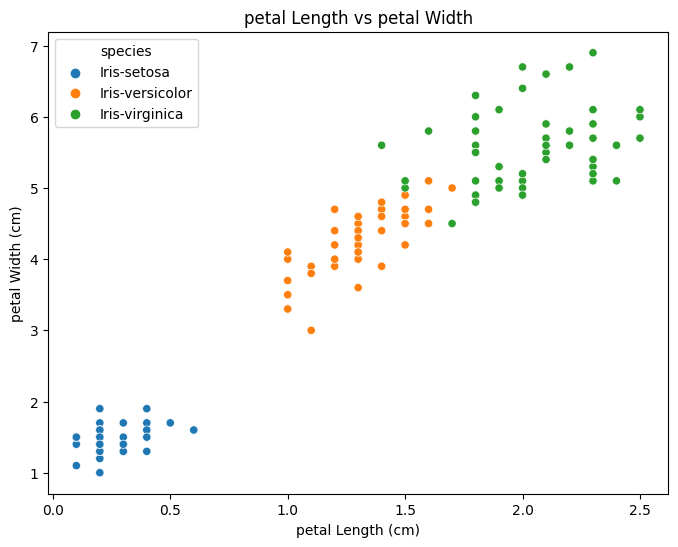

In [10]:
# Create the scatter plot

plt.figure(figsize=(8, 6))

sns.scatterplot(y='petallengthcm', x='petalwidthcm', hue='species',data=df)

plt.title('petal Length vs petal Width')

plt.xlabel('petal Length (cm)')

plt.ylabel('petal Width (cm)')

plt.show()

- ***The petal length and width for the Iris-setosa species are generally small, while for Iris-versicolor, they are typically of medium size. On the other hand, for Iris-virginica, the petal length and width tend to be large.***

<Figure size 800x600 with 0 Axes>

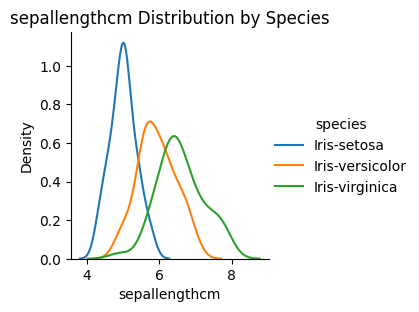

<Figure size 800x600 with 0 Axes>

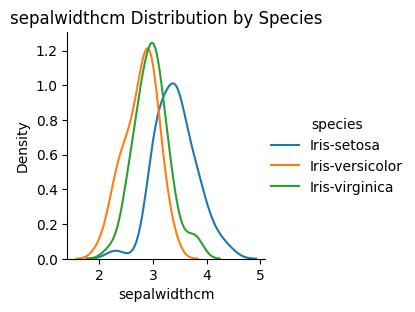

<Figure size 800x600 with 0 Axes>

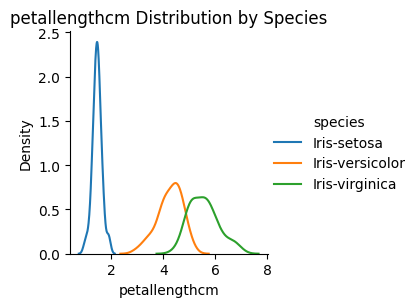

<Figure size 800x600 with 0 Axes>

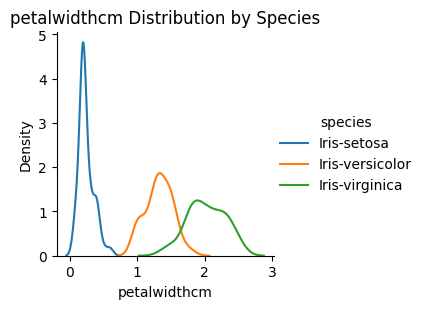

In [11]:
# creating kde plot for every feature
features = ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']
species_column = 'species'  

for feature in features:
    
    plt.figure(figsize=(8, 6))
    
    sns.FacetGrid(df, hue=species_column) \
        .map(sns.kdeplot, feature) \
        .add_legend()
    
    plt.title(f'{feature} Distribution by Species')
    
    plt.xlabel(feature)
    
    plt.ylabel('Density')
   
    plt.show()


- Based on the above plot, we can make the following observations:
    - For iris-setosa, the sepal length is relatively smaller compared to the other species, but the sepal width appears to be larger in comparison.
    - In the case of iris-versicolor, the sepal length is of medium size, whereas the sepal width tends to be smaller.
    - For iris-virginica, the sepal length is generally larger, while the sepal width appears to be of medium size.
    - The petal length and width for the Iris-setosa species are generally small, while for Iris-versicolor, they are typically of medium size. On the other hand, for Iris-virginica, the petal length and width tend to be large.
    
    



- These observations suggest distinct patterns in sepal, petal length and width across the different iris species.

In [15]:
# drop unwanted column
df.drop(columns='id', inplace=True)

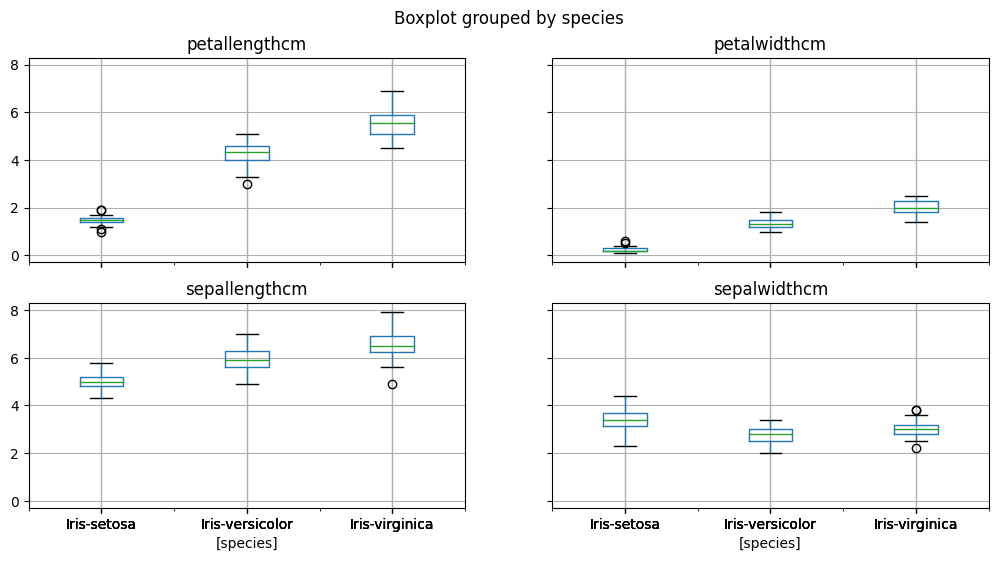

In [21]:
# create a boxplot by species
df.boxplot(by="species", figsize=(12, 6))
plt.show()

- For iris-setosa:
    - Petal length ranges from 1 to 2 cm.
    - Petal width ranges from 0 to 1 cm.
    - Sepal length ranges from 4 to 6 cm.
    - Sepal width ranges from 2 to 5 cm.
    
    
- For iris-versicolor:
    - Petal length ranges from 3 to 5 cm.
    - Petal width ranges from 1 to 2 cm.
    - Sepal length ranges from 5 to 7 cm.
    - Sepal width ranges from 2 to 4.5 cm.


- For iris-virginica:
    - Petal length ranges from 4.5 to 7 cm.
    - Petal width ranges from 1.5 to 2.5 cm.
    - Sepal length ranges from 5 to 8 cm.
    - Sepal width ranges from 2 to 4 cm.

In [23]:
# assigning feature and target
X = df.drop([ 'species'], axis=1)
y = df['species']

print(X.shape)

print(y.shape)

(150, 4)
(150,)


In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### <span style="background-color: #fd7e14; color: #fff; padding: 5px 10px; border-radius: 5px; font-family: Arial, sans-serif; font-size: 18px; font-weight: bold;">Logistic Regression</span>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy = round(accuracy, 3)
print("Accuracy Score:", accuracy)
print("---------------------------------------------------------------------------------------------------")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

print("Out of {} testing values {} mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))


Accuracy Score: 0.978
---------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.95      0.97        19

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

---------------------------------------------------------------------------------------------------
Confusion Matrix:
[[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]
---------------------------------------------------------------------------------------------------
Out of 45 testing values 1  mis-classified.


### <span style="background-color: #fd7e14; color: #fff; padding: 5px 10px; border-radius: 5px; font-family: Arial, sans-serif; font-size: 18px; font-weight: bold;">K Neighbors Classifier</span>

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy = round(accuracy, 3)
print("Accuracy Score:", accuracy)
print("---------------------------------------------------------------------------------------------------")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

print("Out of {} testing values, {} mis-classified.".format(y_test.shape[0], sum(y_test != y_pred)))


Accuracy Score: 0.911
---------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.75      1.00      0.86        12
 Iris-virginica       1.00      0.79      0.88        19

       accuracy                           0.91        45
      macro avg       0.92      0.93      0.91        45
   weighted avg       0.93      0.91      0.91        45

---------------------------------------------------------------------------------------------------
Confusion Matrix:
[[14  0  0]
 [ 0 12  0]
 [ 0  4 15]]
---------------------------------------------------------------------------------------------------
Out of 45 testing values, 4 mis-classified.


### <span style="background-color: #fd7e14; color: #fff; padding: 5px 10px; border-radius: 5px; font-family: Arial, sans-serif; font-size: 18px; font-weight: bold;">Random Forest Classifier</span>

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy = round(accuracy, 3)
print("Accuracy Score:", accuracy)
print("---------------------------------------------------------------------------------------------------")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("---------------------------------------------------------------------------------------------------")

print("Out of {} testing values, {} mis-classified.".format(y_test.shape[0], sum(y_test != y_pred)))


Accuracy Score: 0.956
---------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.86      1.00      0.92        12
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

---------------------------------------------------------------------------------------------------
Confusion Matrix:
[[14  0  0]
 [ 0 12  0]
 [ 0  2 17]]
---------------------------------------------------------------------------------------------------
Out of 45 testing values, 2 mis-classified.


### Prediction 

In [42]:
new_data = np.array([[6.7,3.0,5.2,2.3]])

# Make predictions on the new data
predictions =logreg.predict(new_data)

# Print the predicted species
predicted_species = predictions[0]
print("Predicted Species:", predicted_species)

Predicted Species: Iris-virginica


In [49]:
new_data = np.array([[5.1	,3.5	,1.4	,0.2]])

# Make predictions on the new data
predictions =rf.predict(new_data)

# Print the predicted species
predicted_species = predictions[0]
print("Predicted Species:", predicted_species)

Predicted Species: Iris-setosa


In [47]:
new_data = np.array([[6.4	,3.2	,4.5	,1.5]])

# Make predictions on the new data
predictions =logreg.predict(new_data)

# Print the predicted species
predicted_species = predictions[0]
print("Predicted Species:", predicted_species)

Predicted Species: Iris-versicolor


**We can predict accurate species from given lengh and width**